#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


In [2]:
#import library
import pandas as pd # pandas
import numpy as np # numpy
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [3]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [4]:
PATH = "final_house_loan.csv" # Path to your file

df = read_dataset(PATH)

df.shape

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


(47297, 8)

## Data Analysis

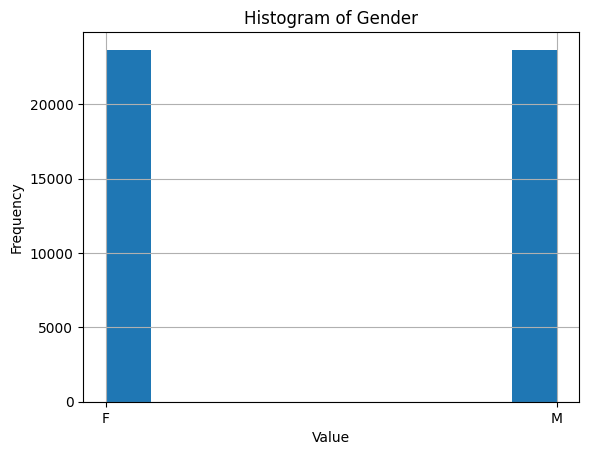

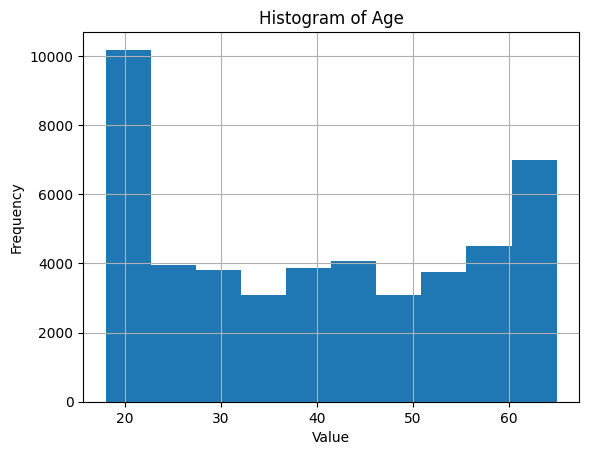

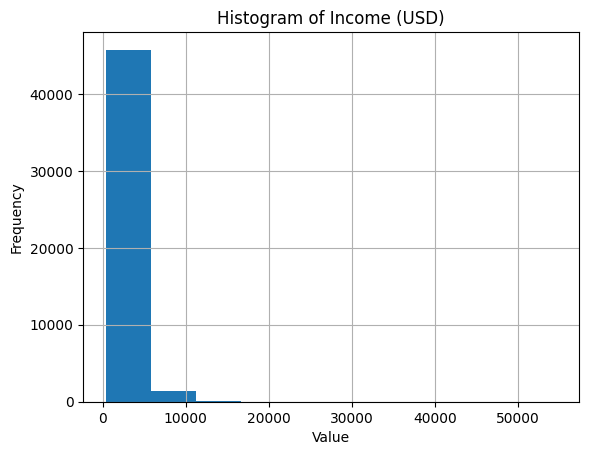

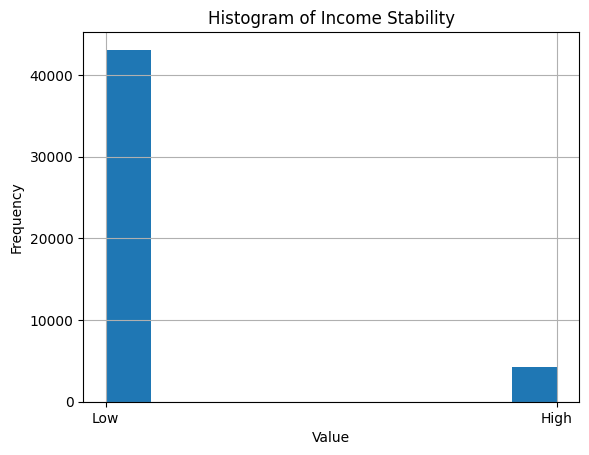

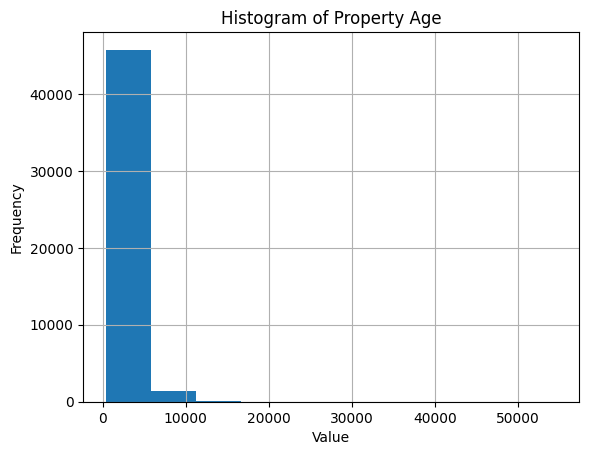

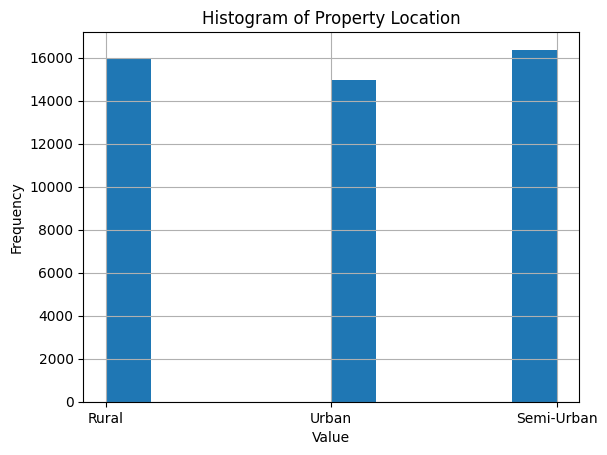

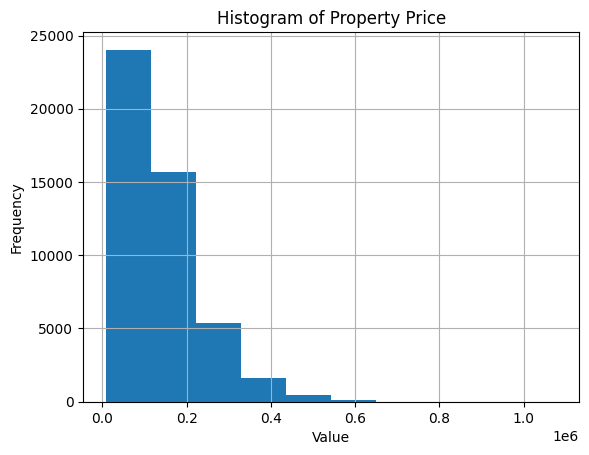

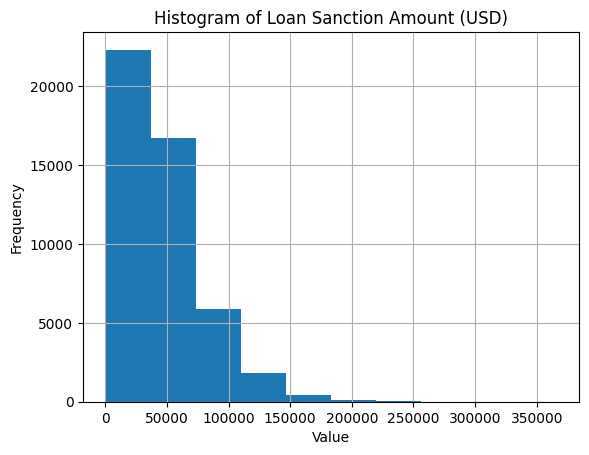

In [5]:
# Iterating through columns and plotting histograms
for column in df.columns:
    plt.figure()  # Create a new figure for each column
    df[column].hist()  # Plot histogram of the current column
    plt.title('Histogram of ' + column)  # Set title for the plot
    plt.xlabel('Value')  # Set label for the x-axis
    plt.ylabel('Frequency')  # Set label for the y-axis
    plt.show()  # Show the plot

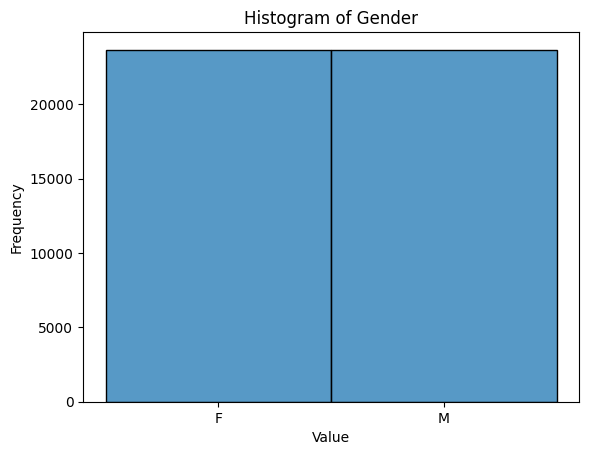

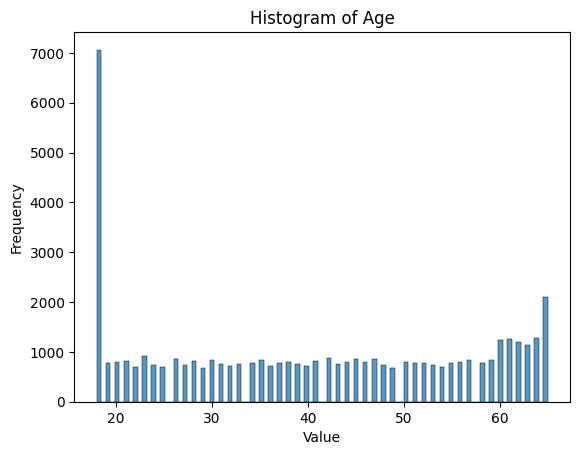

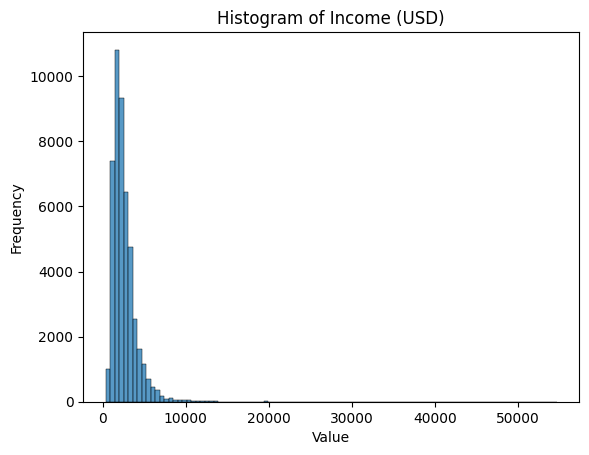

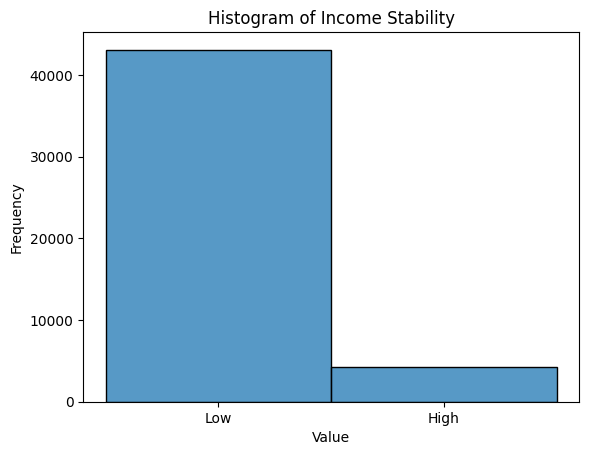

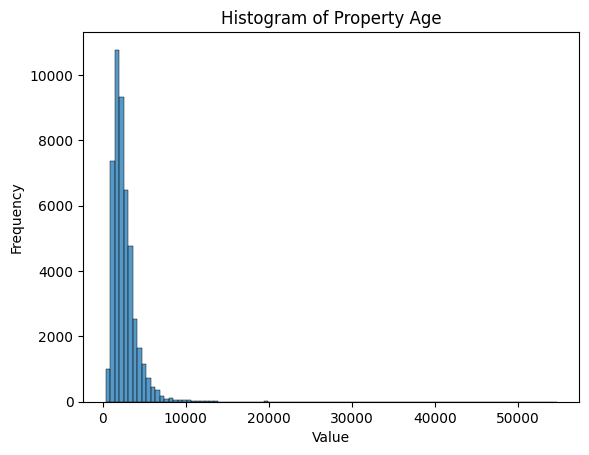

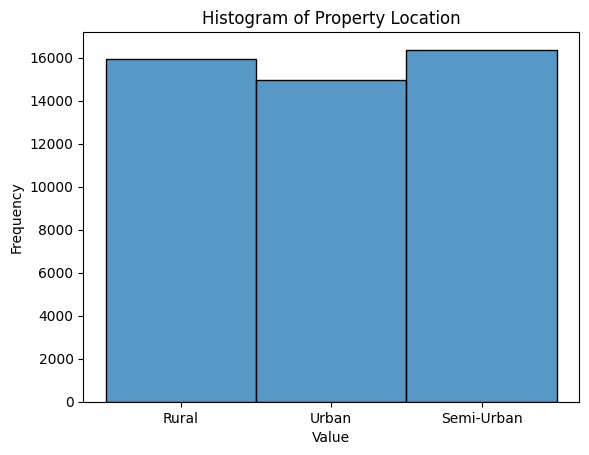

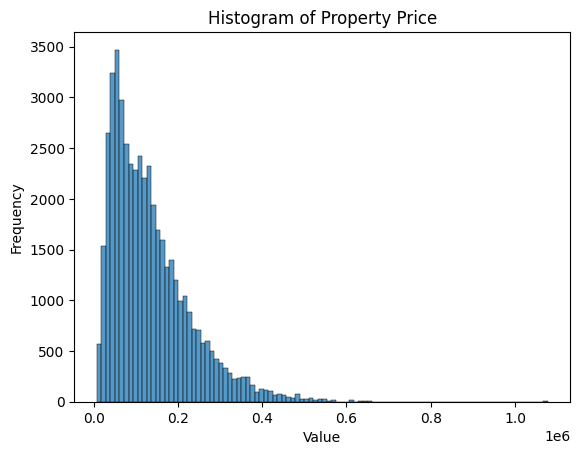

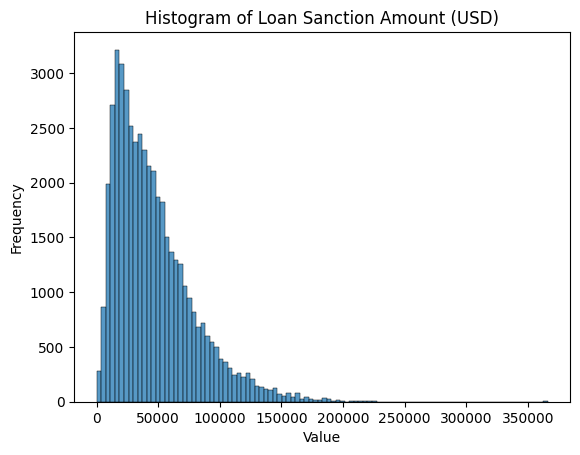

In [6]:
# Iterating through columns and plotting histograms using seaborn
for column in df.columns:
    sns.histplot(x = column, data = df,  bins=100)
    plt.title('Histogram of ' + column)  # Set title for the plot
    plt.xlabel('Value')  # Set label for the x-axis
    plt.ylabel('Frequency')  # Set label for the y-axis
    plt.show()  # Show the plot

## Preprocessing

In [7]:
# Null checking
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [8]:
# Duplicate checking
df.duplicated().sum()

0

In [9]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df["Gender"] = df["Gender"].astype("category").cat.codes
    df["Income Stability"] = df["Income Stability"].astype("category").cat.codes
    df["Property Location"] = df["Property Location"].astype("category").cat.codes
    df.fillna(df.mean(), inplace= True) # Fill NaN with mean values
    return df

In [10]:
preprocessing_data = preprocessing_data(df.copy())

display(preprocessing_data.head())

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


## Feature Engineering

In [11]:
def normalize_data(df):
    start_time = time.time()

    normalized_data = df.copy()
    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time", time.time() - start_time)

    return normalized_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007725,-0.002613,-0.019546,-0.002706,0.009261,0.005980,0.003493
Age,0.007725,1.000000,-0.044046,-0.452643,-0.044012,-0.007695,-0.003330,-0.000319
Income (USD),-0.002613,-0.044046,1.000000,0.081048,0.999973,-0.000594,0.357952,0.392658
Income Stability,-0.019546,-0.452643,0.081048,1.000000,0.081087,-0.001785,0.005423,-0.070436
Property Age,-0.002706,-0.044012,0.999973,0.081087,1.000000,-0.000653,0.357929,0.392591
Property Location,0.009261,-0.007695,-0.000594,-0.001785,-0.000653,1.000000,-0.000632,-0.001780
Property Price,0.005980,-0.003330,0.357952,0.005423,0.357929,-0.000632,1.000000,0.994240
Loan Sanction Amount (USD),0.003493,-0.000319,0.392658,-0.070436,0.392591,-0.001780,0.994240,1.000000


Running time 0.020481348037719727


<Axes: >

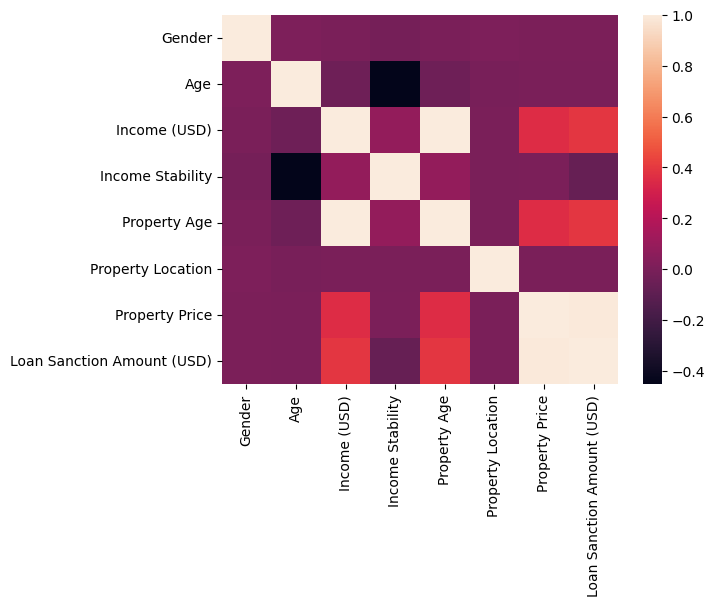

In [12]:
# Heatmap
import seaborn as sns

normalized_data = normalize_data(preprocessing_data.copy())
sns.heatmap(normalized_data.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [14]:
def prepare_X_y(df):
    ## Split X, y from dataset
    columns = df.columns.tolist()     # Columns name
    columns.remove('Loan Sanction Amount (USD)')           # Remove y label (column 'Loan Sanction Amount (USD)' in this case)
    # columns = ['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Property Age', 'Property Location', 'Property Price']
    X = df[columns]                             # X
    y = df["Loan Sanction Amount (USD)"]        # y
    return X, y

X, y = prepare_X_y(normalized_data)

In [15]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2030) # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [16]:
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(37837, 7)
Test:(9460, 7)


## Basic Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY))
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY))

print("Coefficient: ", model.coef_) # print coefficient
print()
print("Intercept: ", model.intercept_) # print intercept_

MSE_linear = mean_squared_error(y_pred=pred, y_true=testY)


mean absolute error of linear model on train set  221.2842110293763
mean absolute error of linear model on test set  216.40251304460133
Coefficient:  [-2.52423664e+02 -7.90226208e+01  1.57159999e+01 -1.10808362e+04
 -1.46948268e+01 -6.33345752e+01  3.36284011e-01]

Intercept:  11857.3658324102


In [18]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
    model = Lasso(alpha=0.1, fit_intercept=True)
    model.fit(X, y)

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print("Coefficient: ", model.coef_) # print coefficient
print()
print("Intercept: ", model.intercept_) # print intercept_

MSE_lasso= mean_squared_error(y_pred=pred, y_true=testY)

mean absolute error of linear model on train set  173.2131124010655
mean absolute error of linear model on test set  167.58372196134724
Coefficient:  [-2.47503394e+02 -7.91332166e+01  1.72946480e+00 -1.10850177e+04
 -7.09124018e-01 -6.13899899e+01  3.36290809e-01]

Intercept:  11863.33621734698


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.919e+10, tolerance: 3.987e+09
  model = cd_fast.enet_coordinate_descent(


In [19]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = Ridge(alpha=0.5, fit_intercept=True)
    model.fit(X, y)

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print("Coefficient: ", model.coef_) # print coefficient
print()
print("Intercept: ", model.intercept_) # print intercept_

MSE_ridge = mean_squared_error(y_pred=pred, y_true=testY)

mean absolute error of linear model on train set  221.36214738617227
mean absolute error of linear model on test set  216.4815553215163
Coefficient:  [-2.52392419e+02 -7.90044526e+01  1.57163680e+01 -1.10785897e+04
 -1.46952233e+01 -6.33291981e+01  3.36284129e-01]

Intercept:  11854.632100001647


In [20]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = ElasticNet(alpha=0.1, l1_ratio=0.5, fit_intercept=True)
    model.fit(X, y)

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

MSE_ElasticNet = mean_squared_error(y_pred=pred, y_true=testY)

mean absolute error of linear model on train set  927.4922334798744
mean absolute error of linear model on test set  910.45540113096
[-1.74276287e+02 -4.02225908e+01  1.78858352e+00 -6.27292400e+03
 -8.29099419e-01 -4.89025755e+01  3.36542057e-01]

6003.909436727023


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+11, tolerance: 3.987e+09
  model = cd_fast.enet_coordinate_descent(


### Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression

In [21]:
print("mean squared error of Linear Regression: ", MSE_linear)
print("mean squared error of Lasso Regression: ", MSE_lasso)
print("mean squared error of Ridge Regression: ", MSE_ridge)
print("mean squared error of ElasticNet Regression: ", MSE_ElasticNet)

mean squared error of Linear Regression:  2282512.11357282
mean squared error of Lasso Regression:  2304997.945333389
mean squared error of Ridge Regression:  2282500.395513577
mean squared error of ElasticNet Regression:  3744942.5762657737


- Linear Regression has the lowest MSE among all the models.
- Ridge Regression has a similar MSE to Linear Regression, indicating comparable performance.
- Lasso Regression has slightly higher MSE compared to Linear and Ridge Regression.
- ElasticNet Regression has the highest MSE among all the models, indicating relatively worse performance compared to the other models.

In summary, based on MSE values, the performance ranking from best to worst would be: Linear Regression ≈ Ridge Regression < Lasso Regression < ElasticNet Regression.

## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [22]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  155.2475653125953
mean absolute error of linear model (with poly transform) on test set  151.33508579487625


In [23]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(9, include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  18675.611150571956
mean absolute error of linear model (with poly transform) on test set  19961.098490506705


We see that when raising the n factor high, the execution time will be very long and the difference between the trainset's MAE and the testset's MAE will be higher. At the same time, the magnitude of MAE also becomes very high